In [ ]:
import pandas as pd

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/VishalGupta/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Data exploration

### Reading data

In [3]:
train = pd.read_csv('healthcare/train_data.csv')
train.columns = [s.lower().replace(' ', '_') for s in train.columns]
train.head()

,case_id,hospital_code,hospital_type_code,city_code_hospital,hospital_region_code,available_extra_rooms_in_hospital,department,ward_type,ward_facility_code,bed_grade,patientid,city_code_patient,type_of_admission,severity_of_illness,visitors_with_patient,age,admission_deposit,stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [4]:
train.shape

(318438, 18)

In [5]:
## data definitions
data_dict = pd.read_csv('healthcare/train_data_dictionary.csv')
data_dict

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


In [6]:
## Variable that can be dropped of - 
# 1. case_id
# 2. hospital code (may be) -NO
# 3. Available extra rooms in the hospital - give the hypothesis that stay in hospital is independent of available 
# extra rooms
# 4. patient_id
# 5. visitors_with_patient??

### case id

In [7]:
train['case_id'].nunique()
# all unique hence not needed

318438

### city_code_patient  vs city_code_hospital

In [8]:
x = train[['city_code_patient', 'city_code_hospital']]
mask = x['city_code_patient'] == x['city_code_hospital']
len(x[mask])/len(train)

0.0738071461320571

new variable can be created same city code or not

### hospital code

In [9]:
train['hospital_code'].unique()

array([ 8,  2, 10, 26, 23, 32,  1, 22, 16,  9,  6, 29, 12,  3, 21, 28, 27,
       19,  5, 14, 13, 31, 24, 17, 25, 15, 11, 30, 18,  4,  7, 20])

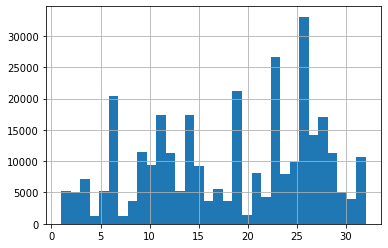

In [10]:
# plotting each hospital code with data counts
train['hospital_code'].hist(bins=train['hospital_code'].nunique())

In [11]:
train.pivot_table(index='hospital_code', columns='stay', values='patientid', aggfunc='count')

stay,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,More than 100 Days
hospital_code,,,,,,,,,,,
1,369,1062,1335,937,215,716,58,239,154,49,115
2,274,970,972,955,153,943,53,312,181,73,216
3,795,1964,1993,1117,228,574,56,138,79,53,119
4,200,406,370,137,31,63,10,8,5,4,6
5,332,1423,1558,929,151,549,33,124,68,30,64
6,1125,5627,6014,3376,542,2209,122,562,306,165,377
7,202,470,326,168,30,73,5,18,5,2,7
8,217,907,1270,607,129,302,28,99,40,24,40
9,765,2760,3055,2028,329,1578,95,377,215,89,219


### hospital type code

In [13]:
train['hospital_type_code'].unique()

array(['c', 'e', 'b', 'a', 'f', 'd', 'g'], dtype=object)

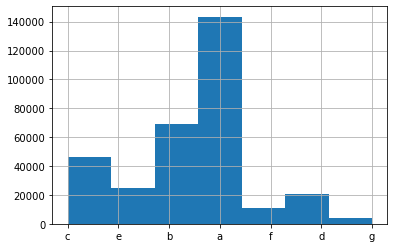

In [14]:
# plotting each hospital type code with data counts
train['hospital_type_code'].hist(bins=train['hospital_type_code'].nunique())

In [15]:
train.pivot_table(index='hospital_type_code', columns='stay', values='patientid', aggfunc='count')

stay,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,More than 100 Days
hospital_type_code,,,,,,,,,,,
a,10559,39807,40286,23974,4111,14617,924,3722,1890,962,2573
b,5145,13933,19541,12385,3893,6909,917,2608,1026,783,1806
c,3588,10318,12526,8222,1872,5176,430,1611,725,439,1021
d,1314,4423,5527,3706,760,2713,186,761,421,180,398
e,1805,6644,6524,4060,764,2832,197,824,395,218,507
f,1023,2332,1897,2093,204,1960,44,482,254,138,276
g,170,682,1190,719,139,811,46,246,127,45,102


### city code

In [16]:
train['city_code_hospital'].unique()

array([ 3,  5,  1,  2,  6,  9, 10,  4, 11,  7, 13])

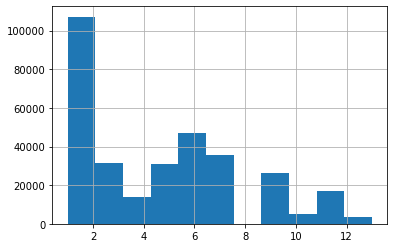

In [17]:
# plotting each city_code_hospital with data counts
train['city_code_hospital'].hist(bins=train['city_code_hospital'].nunique())

### hospital region code

['Z' 'X' 'Y']


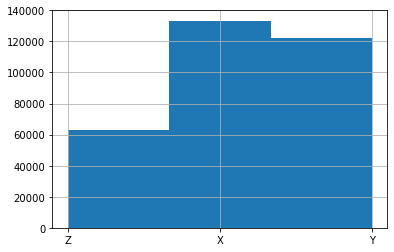

In [18]:
print(train['hospital_region_code'].unique())
train['hospital_region_code'].hist(bins=train['hospital_region_code'].nunique())

In [19]:
train[['hospital_code', 'hospital_type_code', 'hospital_region_code', 'city_code_hospital']].drop_duplicates().\
    sort_values(['hospital_type_code', 'hospital_region_code'])

,hospital_code,hospital_type_code,hospital_region_code,city_code_hospital
5,23,a,X,6
14,6,a,X,6
17,29,a,X,4
33,5,a,X,1
50,14,a,X,1
65,24,a,X,1
120,4,a,X,4
128,7,a,X,4
19,12,a,Y,9
29,27,a,Y,7


In [20]:
# hospital attributes are linked so even having just the hospital code can be enough

### available_extra_rooms_in_hospital

[ 3  2  1  4  6  5  7  8  9 10 12  0 11 20 14 21 13 24]


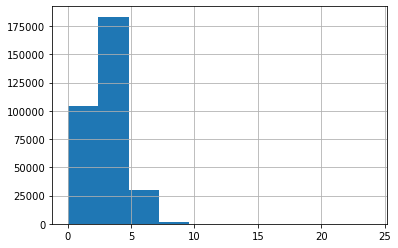

In [21]:
print(train['available_extra_rooms_in_hospital'].unique())
train['available_extra_rooms_in_hospital'].hist()

In [22]:
train.groupby('stay')['available_extra_rooms_in_hospital'].agg(['mean', 'std'])

,mean,std
stay,,
0-10,3.268599,1.192931
11-20,3.262814,1.176184
21-30,3.359008,1.176063
31-40,3.136242,1.135904
41-50,3.334412,1.239631
51-60,2.911731,1.067263
61-70,3.179300,1.225234
71-80,2.872733,1.065078
81-90,2.844977,1.074420


#### Is there a correlation between, stay and mean available rooms? can this be a dependent variable in classification model?

## rest variable

In [23]:


# 6	Department	Department overlooking the case
# 7	Ward_Type	Code for the Ward type
# 8	Ward_Facility_Code	Code for the Ward Facility
# 9	Bed Grade	Condition of Bed in the Ward
# 10	patientid	Unique Patient Id
# 11	City_Code_Patient	City Code for the patient
# 12	Type of Admission	Admission Type registered by the Hospital
# 13	Severity of Illness	Severity of the illness recorded at the time o...
# 14	Visitors with Patient	Number of Visitors with the patient
# 15	Age	Age of the patient
# 16	Admission_Deposit	Deposit at the Admission Time
# 17	Stay	Stay Days by the patient

hospital_type_code ['c' 'e' 'b' 'a' 'f' 'd' 'g'] 7


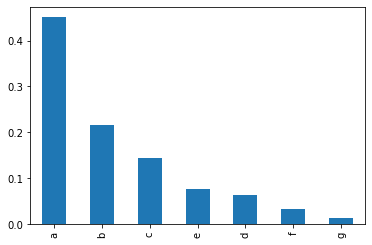

hospital_region_code ['Z' 'X' 'Y'] 3


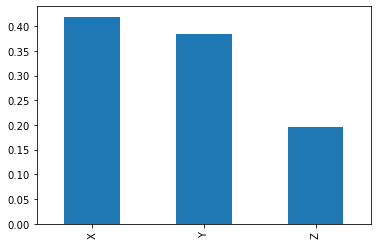

department ['radiotherapy' 'anesthesia' 'gynecology' 'TB & Chest disease' 'surgery'] 5


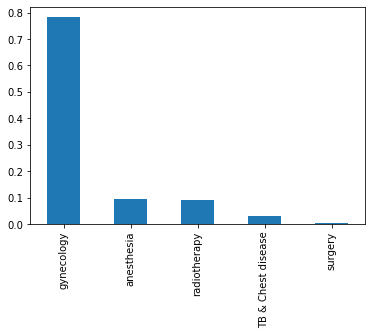

ward_type ['R' 'S' 'Q' 'P' 'T' 'U'] 6


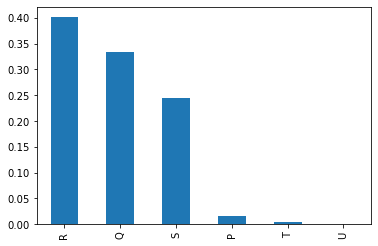

ward_facility_code ['F' 'E' 'D' 'B' 'A' 'C'] 6


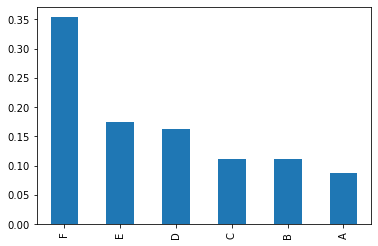

type_of_admission ['Emergency' 'Trauma' 'Urgent'] 3


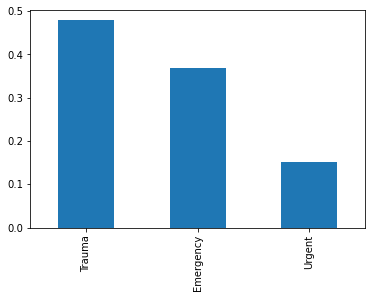

severity_of_illness ['Extreme' 'Moderate' 'Minor'] 3


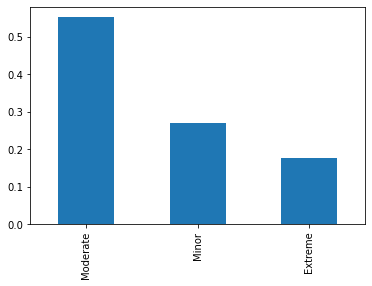

age ['51-60' '71-80' '31-40' '41-50' '81-90' '61-70' '21-30' '11-20' '0-10'
 '91-100'] 10


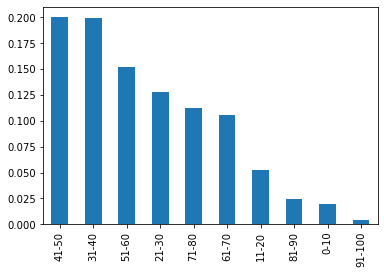

stay ['0-10' '41-50' '31-40' '11-20' '51-60' '21-30' '71-80'
 'More than 100 Days' '81-90' '61-70' '91-100'] 11


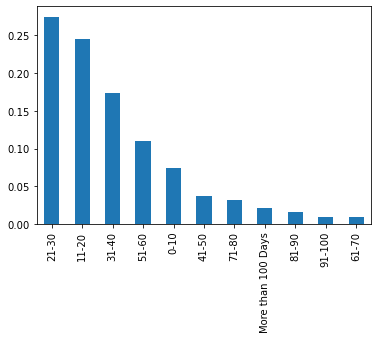

In [25]:
for c in train.columns[2:]:
    if train[c].dtype == 'O':
        print(c, train[c].unique(), train[c].nunique())
        plt.figure()
        x = train[c].value_counts()/len(train)
        x.plot(kind='bar')
        plt.show()

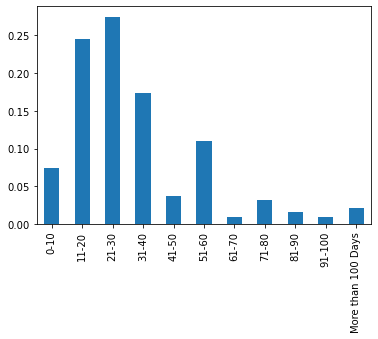

In [53]:
x.sort_index().plot(kind='bar')

In [31]:
train['stay'].value_counts()/len(train)
# mean(train['admission_deposit'])

21-30                 0.275073
11-20                 0.245687
31-40                 0.173082
51-60                 0.109827
0-10                  0.074093
41-50                 0.036779
71-80                 0.032174
More than 100 Days    0.020867
81-90                 0.015172
91-100                0.008646
61-70                 0.008598
Name: stay, dtype: float64

### null values treatment

In [32]:
train.pivot_table(index='bed_grade', columns='stay', values='patientid', aggfunc='count', dropna=False)

stay,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,More than 100 Days
bed_grade,,,,,,,,,,,
1.0,2290,5559,7449,4360,1066,3067,270,986,354,275,536
2.0,9195,25244,41173,19899,5062,13555,1128,3513,1228,909,1391
3.0,7747,30678,25195,19810,3578,11675,818,3587,2013,991,2786
4.0,4018,15614,12499,10243,1835,6166,482,2010,1166,538,1835


In [33]:
null_bed_grade = train[train['bed_grade'].isnull()]
print(len(null_bed_grade))
null_bed_grade['stay'].value_counts().sort_index()

0


Series([], Name: stay, dtype: int64)

#### Should the be removed? - 
- if impute then with what?
- if there is nan in test then what?

In [34]:
train = train[(train['bed_grade'].notnull()) & (train['city_code_patient'].notnull())]
train.shape

(313793, 18)

In [35]:
train.pivot_table(index='city_code_patient', columns='stay', values='patientid', aggfunc='count', dropna=False)

stay,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100,More than 100 Days
city_code_patient,,,,,,,,,,,
1.0,1859.0,6539.0,7713.0,4510.0,731.0,3062.0,172.0,737.0,386.0,194.0,454.0
2.0,2446.0,10185.0,11872.0,6369.0,1128.0,4371.0,199.0,940.0,523.0,248.0,554.0
3.0,233.0,751.0,828.0,703.0,175.0,493.0,61.0,187.0,93.0,69.0,179.0
4.0,1432.0,3965.0,3986.0,2555.0,669.0,1639.0,126.0,433.0,215.0,123.0,236.0
5.0,1588.0,4583.0,4997.0,3608.0,816.0,2436.0,230.0,807.0,335.0,197.0,482.0
6.0,631.0,1735.0,1424.0,1027.0,210.0,548.0,51.0,181.0,72.0,49.0,77.0
7.0,1690.0,5839.0,6264.0,4230.0,808.0,2843.0,200.0,766.0,449.0,194.0,514.0
8.0,8266.0,28781.0,34786.0,21894.0,4919.0,13457.0,1173.0,4444.0,1964.0,1184.0,3109.0
9.0,1044.0,2905.0,3011.0,2059.0,504.0,1300.0,125.0,376.0,162.0,112.0,196.0


In [36]:
null_city_code_patient = train[train['city_code_patient'].isnull()]
print(len(null_city_code_patient))
null_city_code_patient['stay'].value_counts().sort_index()

0


Series([], Name: stay, dtype: int64)

In [37]:
4532/len(train), 113/len(train)

(0.014442642123947953, 0.00036011000882747545)

In [38]:
nonnull_city_code_patient = train[~train['city_code_patient'].isnull()]
print(nonnull_city_code_patient.shape)
sum(nonnull_city_code_patient['city_code_patient'] == nonnull_city_code_patient['city_code_hospital'])/len(nonnull_city_code_patient)

(313793, 18)


0.07489969502187747

In [39]:
train.drop(['case_id', 'patientid'], axis=1, inplace=True)

In [40]:
train.columns

Index(['hospital_code', 'hospital_type_code', 'city_code_hospital',
       'hospital_region_code', 'available_extra_rooms_in_hospital',
       'department', 'ward_type', 'ward_facility_code', 'bed_grade',
       'city_code_patient', 'type_of_admission', 'severity_of_illness',
       'visitors_with_patient', 'age', 'admission_deposit', 'stay'],
      dtype='object')

#### city of a patient has nothing to do with the severity hence it can be dropped for modelling

variables that can be used - 
1. hospital code - categorical
2. hospital type code - categorical
3. city code hospital - categorical (numeric but to be considered as categorical variables)
4. hospital region code - categorical
5. available_extra_rooms_in_hospital - numeric
6. department - categorical
7. ward_type - categorical
8. ward_facility_code - categorical
9. bed_grade - categorical (numeric but to be considered as categorical variables) ??
10. city_code_patient
11. type_of_admission - categorical
12. severity_of_illness - categorical
13. vistors_with_patient - can be used as a proxy for severity
14. age - categorical
15. admission_deposit - numeric ??

### Questions - 
1. do we need bed grade
2. do we need admission_deposit
3. do we need visitors_with_patient
4. do we need available_extra_rooms_in_hospital
5. why does gynecology have a lot of patient?
6. 

### Coverting city code hospital, bed_grade, hospital_code to category

In [54]:
train['city_code_hospital'] = train['city_code_hospital'].astype(str)
train['bed_grade'] = train['bed_grade'].astype(str)
train['hospital_code'] = train['hospital_code'].astype(str)
train['city_code_patient'] = train['city_code_patient'].astype(str)


### Interactive plt of predictors

In [66]:
pd.crosstab(train['city_code_patient'], train['city_code_hospital'], values=train['stay'], 
                aggfunc='count')

city_code_hospital,1,10,11,13,2,3,4,5,6,7,9
city_code_patient,,,,,,,,,,,
1.0,7674.0,105.0,6536.0,68.0,1729.0,1001.0,2788.0,751.0,4760.0,333.0,612.0
10.0,4542.0,22.0,339.0,12.0,537.0,288.0,717.0,124.0,1416.0,66.0,109.0
11.0,88.0,11.0,16.0,6.0,128.0,207.0,11.0,94.0,30.0,9.0,58.0
12.0,836.0,93.0,126.0,50.0,746.0,675.0,146.0,665.0,515.0,233.0,1561.0
13.0,217.0,22.0,45.0,2.0,663.0,82.0,58.0,65.0,282.0,121.0,68.0
14.0,549.0,34.0,144.0,64.0,417.0,403.0,162.0,431.0,349.0,102.0,272.0
15.0,1889.0,84.0,631.0,144.0,1630.0,747.0,553.0,624.0,1822.0,344.0,475.0
16.0,467.0,11.0,133.0,34.0,446.0,199.0,119.0,132.0,531.0,101.0,79.0
18.0,220.0,21.0,31.0,293.0,232.0,154.0,56.0,135.0,115.0,55.0,92.0


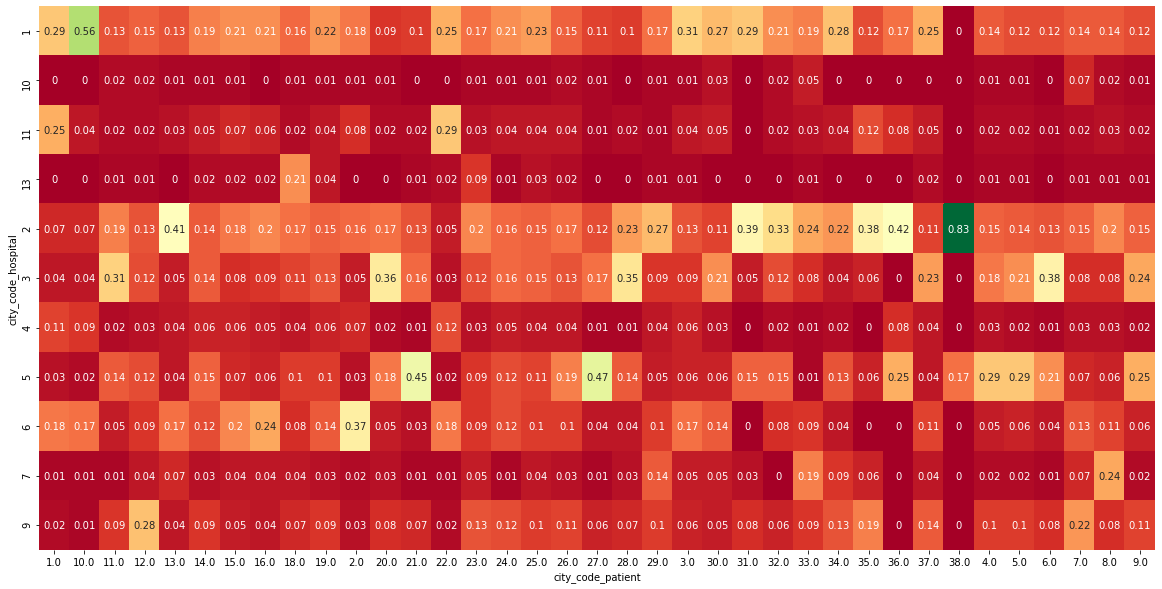

In [57]:
f, ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(
    round(pd.crosstab(train['city_code_hospital'], train['city_code_patient'], values=train['stay'], 
                aggfunc='count', normalize=1), 2),
    cmap='RdYlGn', annot=True, cbar=False
)

In [62]:
sum(train['city_code_hospital'].astype(float) == train['city_code_patient'].astype(float))/len(train)

0.07489969502187747

#### Patient of city A may not neccesarily be hospilaized in city A, only 7.5% gets admitted to the same city


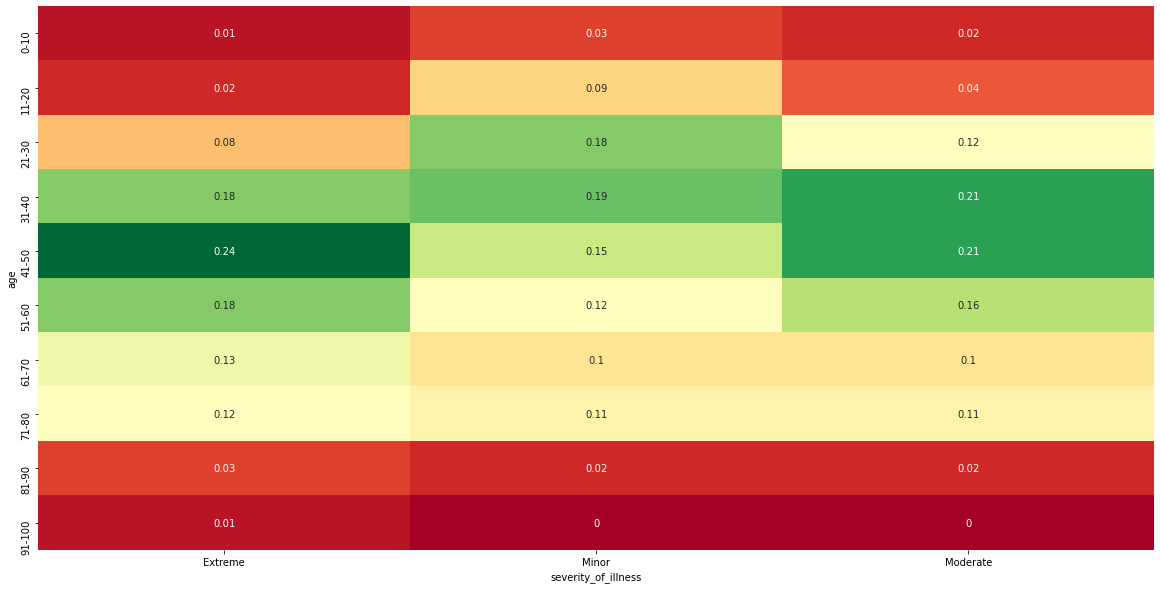

In [68]:
f, ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(
    round(pd.crosstab(train['age'], train['severity_of_illness'], values=train['stay'], 
                aggfunc='count', normalize=1), 2),
    cmap='RdYlGn', annot=True, cbar=False
)

In [62]:
sum(train['city_code_hospital'].astype(float) == train['city_code_patient'].astype(float))/len(train)

0.07489969502187747

#### Patient of city A may not neccesarily be hospilaized in city A, only 7.5% gets admitted to the same city


### Interactive plt of categorical with target

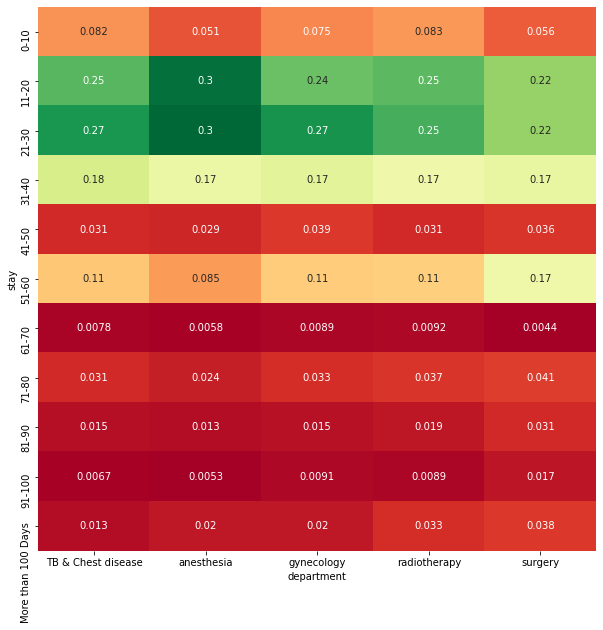

In [44]:
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(
    pd.crosstab(train['stay'], train['department'], values=train['stay'], aggfunc='count', normalize=1),
    cmap='RdYlGn', annot=True, cbar=False
)

#### For most department stay range from 11-40 days

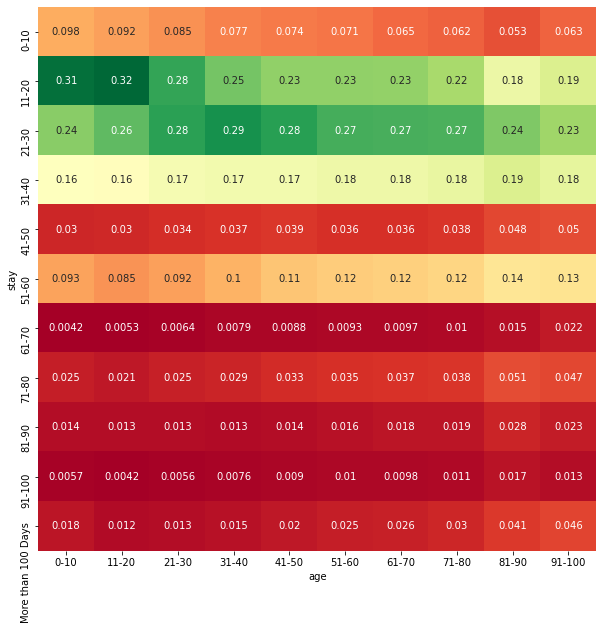

In [45]:
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(
    pd.crosstab(train['stay'], train['age'], values=train['stay'], aggfunc='count', normalize=1),
    cmap='RdYlGn', annot=True, cbar=False
)

#### Youger group 0-20, stay maximum for 11-20 days, while for rest its 21-30 days

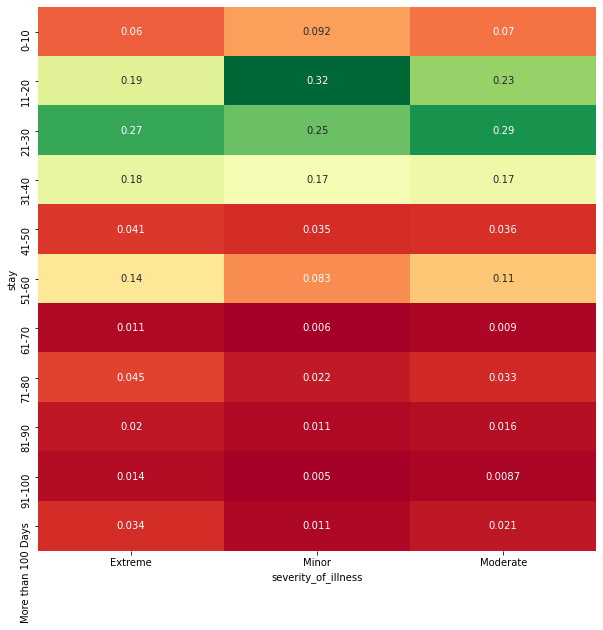

In [46]:
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(
    pd.crosstab(train['stay'], train['severity_of_illness'], values=train['stay'], aggfunc='count',
               normalize=1),
    cmap='RdYlGn', annot=True, cbar=False
)

#### Minor severity stay - 11-20, rest 21-30

Column name hospital_code
Unique values =  32


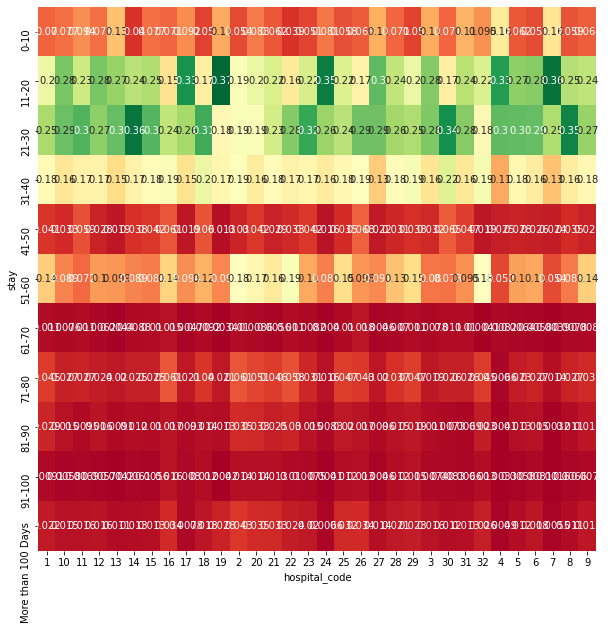

In [47]:
c = 'hospital_code'
print('Column name', c)
print('Unique values = ', train[c].nunique())
f, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(
    pd.crosstab(train['stay'], train[c], values=train['stay'], aggfunc='count',
               normalize=1),
    cmap='RdYlGn', annot=True, cbar=False
)


#### too many to have a clear visual insight which is not previously observed

In [ ]:
for c in train.columns[:-1]:
    if train[c].dtype == 'O':
        print('Column name', c)
        print('Unique values = ', train[c].nunique())
        f, ax = plt.subplots(figsize=(10, 10))

        ax

### Interactive plt of categorical with target

In [ ]:
plt.figure()
plt.plot()